In [269]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Circle
from humanfriendly import format_size, format_timespan
import seaborn as sns

In [39]:
plt.style.use("seaborn-v0_8-whitegrid")
FIGSIZE = (13, 8)
DPI = 300
# https://jfly.uni-koeln.de/color/#cudo
# https://nanx.me/oneclust/reference/cud.html
cud = ["#000000", "#e69f00", "#56b4e9", "#009e73", "#f0e442", "#0072b2", "#d55e00", "#cc79a7"]
PALETTE = cud

In [40]:
uncompressed_size = {"ERR3152364": 28984268662, "ERR2935805": 26045799432}

In [41]:
data = []
for p in Path("../../results/compress/").rglob("*.size"):
    acc = p.name.split(".")[0]
    lvl = int(p.parts[-3])
    tech = p.parts[-2]
    tool = p.parts[-4]
    size = int(p.read_text().strip())
    ratio = size / uncompressed_size[acc]
    data.append((acc, lvl, tech, tool, size, ratio))
size_df = pd.DataFrame(data, columns=["accession", "level", "technology", "tool", "size", "compress_ratio"]).set_index(["accession", "technology", "tool", "level"], drop=False, verify_integrity=True)
size_df

,,,,accession,level,technology,tool,size,compress_ratio
accession,technology,tool,level,,,,,,
ERR2935805,illumina,gzip,9,ERR2935805,9,illumina,gzip,6008384063,0.230685
ERR3152364,nanopore,gzip,9,ERR3152364,9,nanopore,gzip,14894848658,0.513894
ERR2935805,illumina,gzip,7,ERR2935805,7,illumina,gzip,6150884567,0.236156
ERR3152364,nanopore,gzip,7,ERR3152364,7,nanopore,gzip,14913353738,0.514533
ERR2935805,illumina,gzip,6,ERR2935805,6,illumina,gzip,6266291783,0.240587
...,...,...,...,...,...,...,...,...,...
ERR3152364,nanopore,bzip2,3,ERR3152364,3,nanopore,bzip2,12871117216,0.444073
ERR2935805,illumina,bzip2,2,ERR2935805,2,illumina,bzip2,5121006943,0.196615
ERR3152364,nanopore,bzip2,2,ERR3152364,2,nanopore,bzip2,12902873337,0.445168


In [42]:
mode = "compress"
frames = []
for p in Path(f"../../results/benchmark/{mode}").rglob("*.tsv"):
    acc = p.name.split(".")[0]
    lvl = int(p.parts[-3])
    tech = p.parts[-2]
    tool = p.parts[-4]
    subdf = pd.read_csv(p, sep="\t")
    keep = ["s", "max_rss"]
    subdf = subdf[keep]
    subdf.rename(columns={"s": f"{mode}_secs", "max_rss": f"{mode}_max_rss"}, inplace=True)
    subdf["tool"] = tool
    subdf["accession"] = acc
    subdf["technology"] = tech
    subdf["level"] = lvl
    keep = ["s", "max_rss"]
    frames.append(subdf)
compress_frame = pd.concat(frames).set_index(["accession", "technology", "tool", "level"], drop=False, verify_integrity=True)
compress_frame

,,,,compress_secs,compress_max_rss,tool,accession,technology,level
accession,technology,tool,level,,,,,,
ERR2935805,illumina,gzip,9,15731.7481,2.96,gzip,ERR2935805,illumina,9
ERR3152364,nanopore,gzip,9,7410.2766,2.96,gzip,ERR3152364,nanopore,9
ERR2935805,illumina,gzip,7,4777.3273,6.16,gzip,ERR2935805,illumina,7
ERR3152364,nanopore,gzip,7,5249.9289,6.16,gzip,ERR3152364,nanopore,7
ERR2935805,illumina,gzip,6,3179.8289,2.96,gzip,ERR2935805,illumina,6
...,...,...,...,...,...,...,...,...,...
ERR3152364,nanopore,bzip2,3,2092.3235,6.16,bzip2,ERR3152364,nanopore,3
ERR2935805,illumina,bzip2,2,1601.9744,4.11,bzip2,ERR2935805,illumina,2
ERR3152364,nanopore,bzip2,2,1996.9930,4.11,bzip2,ERR3152364,nanopore,2


In [43]:
mode = "decompress"
frames = []
for p in Path(f"../../results/benchmark/{mode}").rglob("*.tsv"):
    acc = p.name.split(".")[0]
    lvl = int(p.parts[-3])
    tech = p.parts[-2]
    tool = p.parts[-4]
    subdf = pd.read_csv(p, sep="\t")
    keep = ["s", "max_rss"]
    subdf = subdf[keep]
    subdf.rename(columns={"s": f"{mode}_secs", "max_rss": f"{mode}_max_rss"}, inplace=True)
    subdf["tool"] = tool
    subdf["accession"] = acc
    subdf["technology"] = tech
    subdf["level"] = lvl
    keep = ["s", "max_rss"]
    frames.append(subdf)
decompress_frame = pd.concat(frames).set_index(["accession", "technology", "tool", "level"], drop=False, verify_integrity=True)
decompress_frame

,,,,decompress_secs,decompress_max_rss,tool,accession,technology,level
accession,technology,tool,level,,,,,,
ERR2935805,illumina,gzip,9,145.9978,2.79,gzip,ERR2935805,illumina,9
ERR3152364,nanopore,gzip,9,238.7803,2.78,gzip,ERR3152364,nanopore,9
ERR2935805,illumina,gzip,7,148.7137,11.36,gzip,ERR2935805,illumina,7
ERR3152364,nanopore,gzip,7,238.9931,2.79,gzip,ERR3152364,nanopore,7
ERR2935805,illumina,gzip,6,150.4319,2.78,gzip,ERR2935805,illumina,6
...,...,...,...,...,...,...,...,...,...
ERR3152364,nanopore,bzip2,3,1106.5112,3.67,bzip2,ERR3152364,nanopore,3
ERR2935805,illumina,bzip2,2,607.0060,3.29,bzip2,ERR2935805,illumina,2
ERR3152364,nanopore,bzip2,2,987.8355,3.28,bzip2,ERR3152364,nanopore,2


In [44]:
df = compress_frame.combine_first(decompress_frame).combine_first(size_df)
df

,,,,accession,compress_max_rss,compress_ratio,compress_secs,decompress_max_rss,decompress_secs,level,size,technology,tool
accession,technology,tool,level,,,,,,,,,,
ERR2935805,illumina,gzip,9,ERR2935805,2.96,0.230685,15731.7481,2.79,145.9978,9,6008384063,illumina,gzip
ERR3152364,nanopore,gzip,9,ERR3152364,2.96,0.513894,7410.2766,2.78,238.7803,9,14894848658,nanopore,gzip
ERR2935805,illumina,gzip,7,ERR2935805,6.16,0.236156,4777.3273,11.36,148.7137,7,6150884567,illumina,gzip
ERR3152364,nanopore,gzip,7,ERR3152364,6.16,0.514533,5249.9289,2.79,238.9931,7,14913353738,nanopore,gzip
ERR2935805,illumina,gzip,6,ERR2935805,2.96,0.240587,3179.8289,2.78,150.4319,6,6266291783,illumina,gzip
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR3152364,nanopore,bzip2,3,ERR3152364,6.16,0.444073,2092.3235,3.67,1106.5112,3,12871117216,nanopore,bzip2
ERR2935805,illumina,bzip2,2,ERR2935805,4.11,0.196615,1601.9744,3.29,607.0060,2,5121006943,illumina,bzip2
ERR3152364,nanopore,bzip2,2,ERR3152364,4.11,0.445168,1996.9930,3.28,987.8355,2,12902873337,nanopore,bzip2


In [171]:
default_lvl = {"gzip": 6, "zstd": 3, "bzip2": 9, "xz": 6}

# Nanopore

/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_1453/1283339122.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(


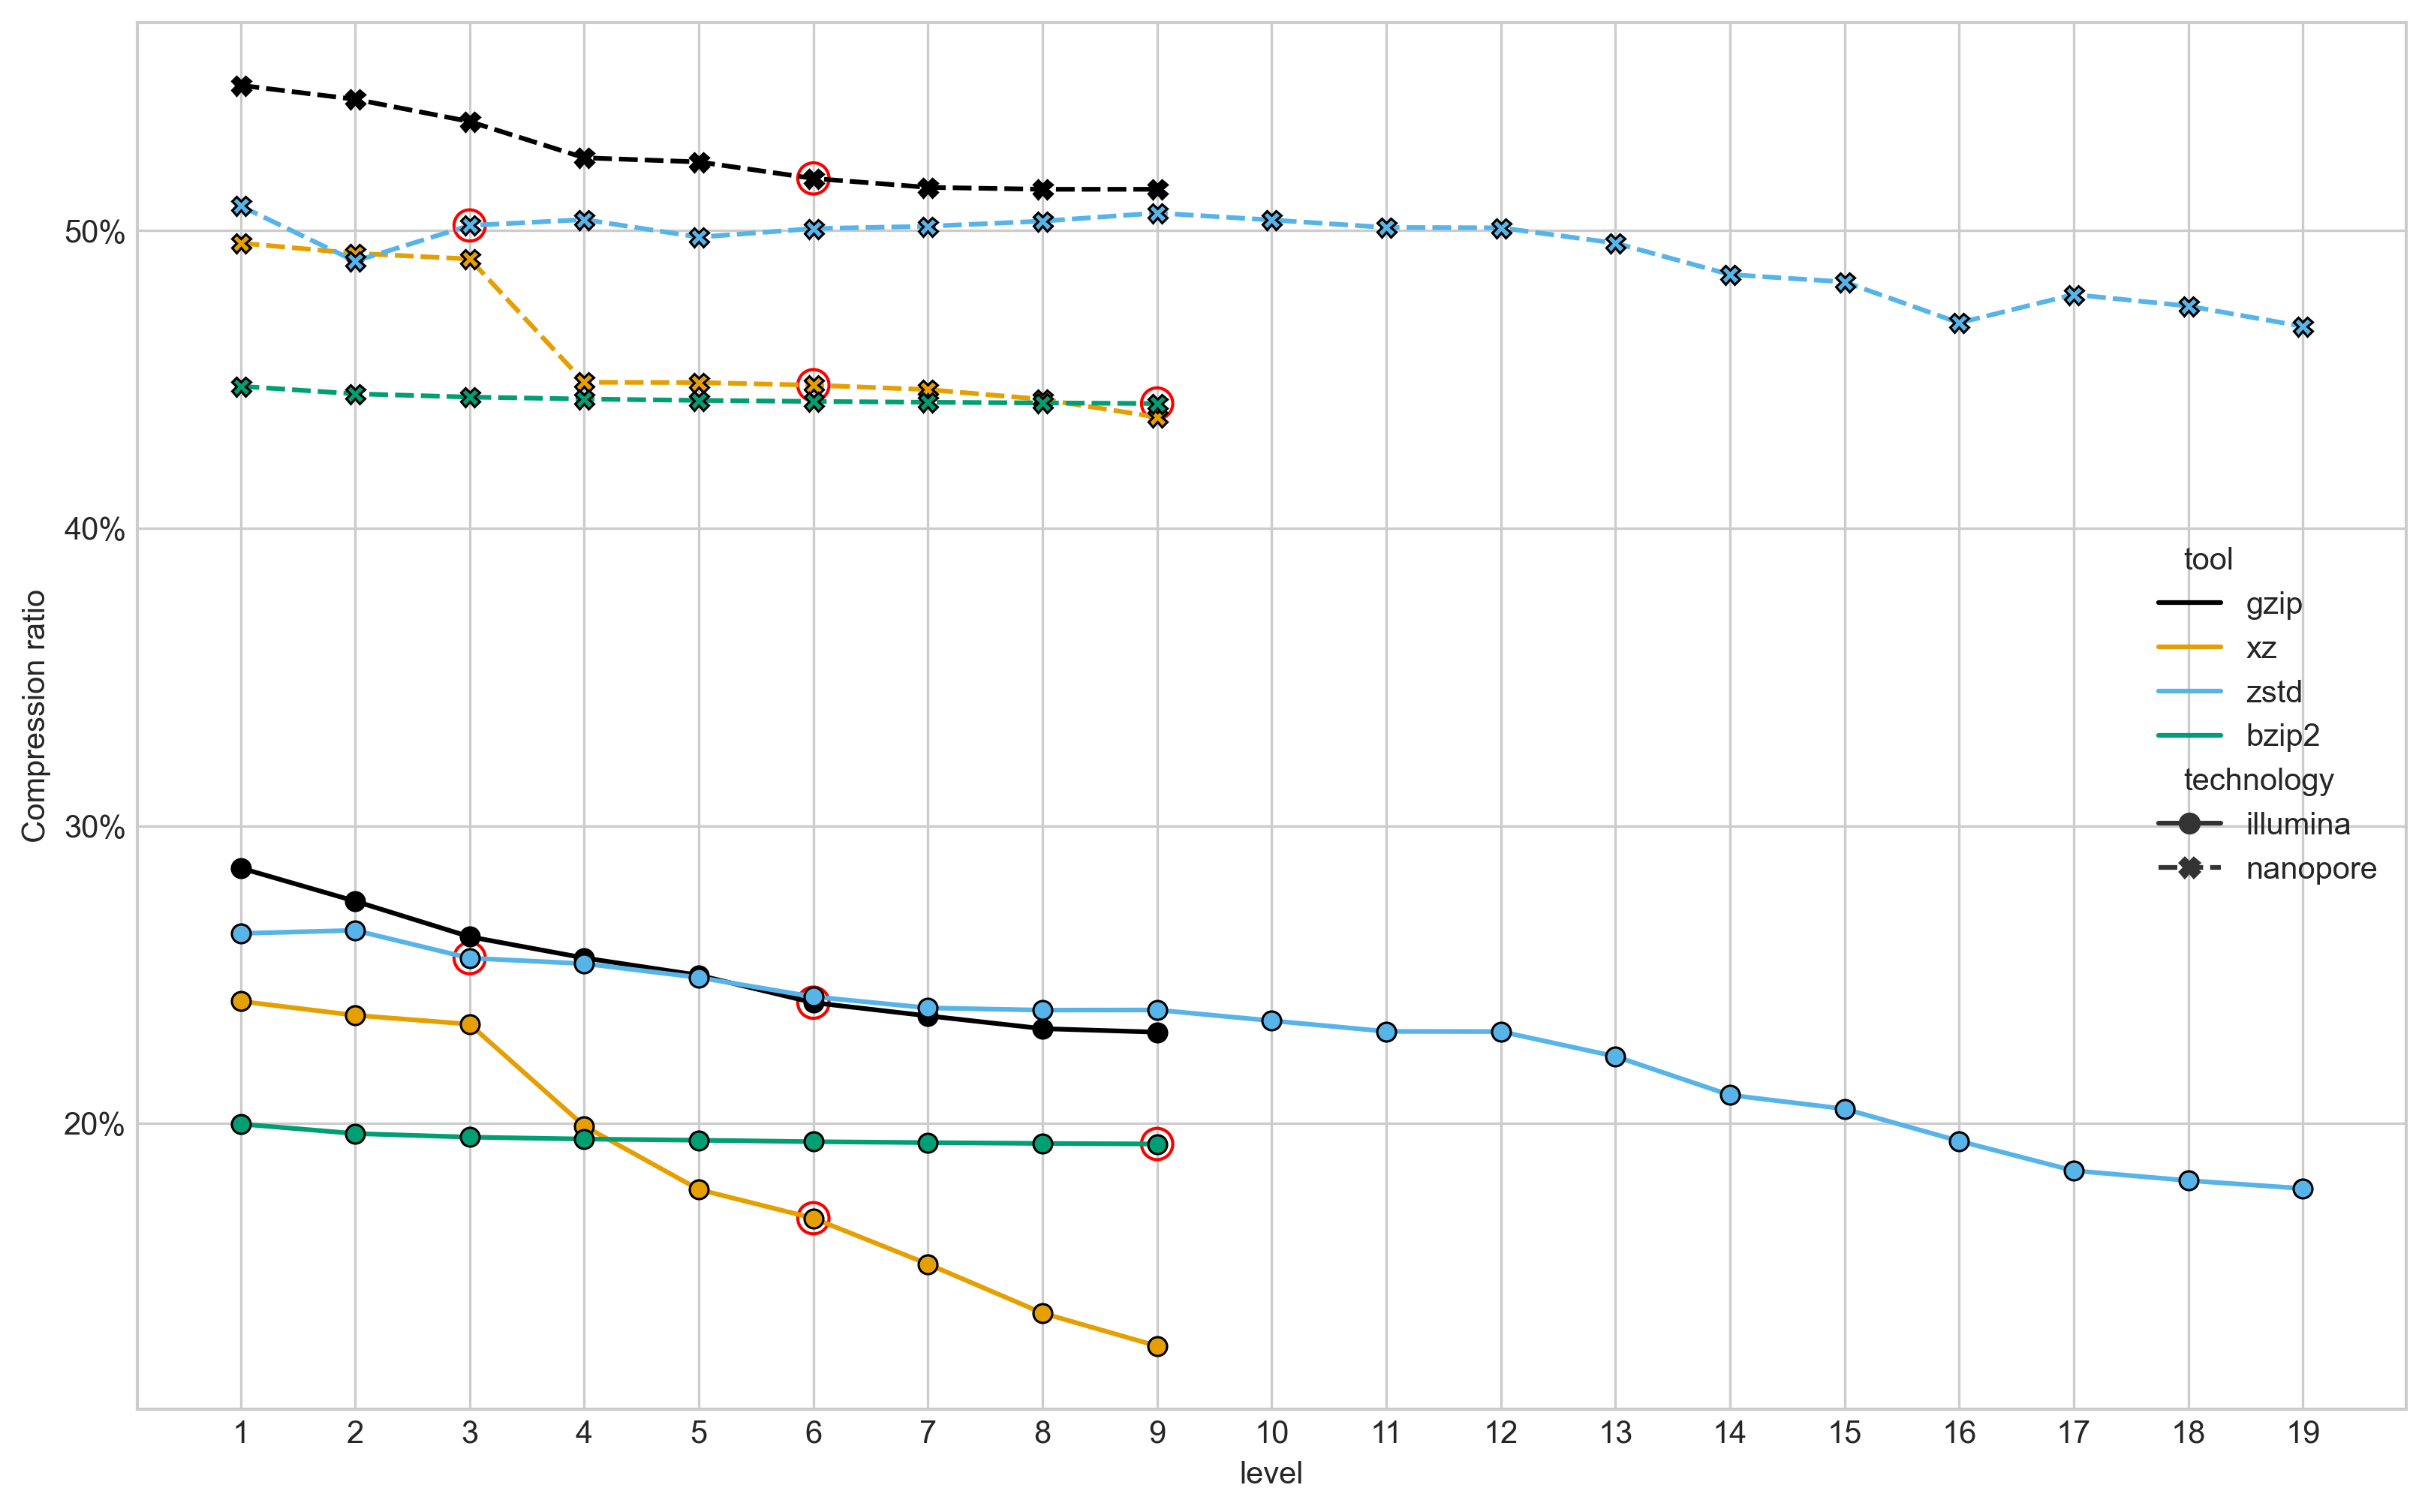

In [274]:
fig, ax = plt.subplots(dpi=DPI, figsize=FIGSIZE)
data = df#.query("technology=='nanopore'")
sns.lineplot(
    data=data, 
    x="level", 
    y="compress_ratio", 
    hue="tool", 
    style="technology",
    palette=PALETTE,
    markers=True,
    ax=ax,
    mec="black"
)
xticks = list(range(1, 20))
_ = ax.set_xticks(xticks)



yticks = [s.get_position()[-1] for s in ax.get_yticklabels()]
# ylabels = [format_size(s) for s in yticks]
# ax.set_yticklabels(ylabels)
ax.set_ylabel("Compression ratio")
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

# add secondary axis to right of plot

# acc = list(set(data["accession"]))[0]
# uncompressed = uncompressed_size[acc]
# secyticks = [y / uncompressed for y in yticks]
# secax = ax.secondary_yaxis('right', functions=(lambda arr: arr / uncompressed, lambda arr: arr* uncompressed))
# # secax.set_yticks(secyticks)
# # secax.set_yticklabels(secyticks)
# secax.set_ylabel('Proportion of original size', rotation=270, labelpad=15)
# ax.legend(loc="upper right")
        
# ax.tick_params(axis="x", bottom=True, rotation=270)
# secax.minorticks_off()

for (tool, lvl) in default_lvl.items():
    for y in set(data.query("tool==@tool and level==@lvl")["compress_ratio"]):
        ax.scatter(lvl, y, s=100, fc='None', ec="red")

In [179]:
df["compress_rate"] = [uncompressed_size[row.accession] / row.compress_secs for _, row in df.iterrows()]
df["decompress_rate"] = [uncompressed_size[row.accession] / row.decompress_secs for _, row in df.iterrows()]

In [249]:
def format_time(s):
    time, unit = s.split()
    if unit.startswith("min"):
        return f"{time} min"
    elif unit.startswith("hou"):
        return f"{time} hr"

/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_1453/114190356.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_1453/114190356.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_1453/114190356.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(
/var/folders/0g/3ywwrf6j2vjbp0r780dskt980000gn/T/ipykernel_1453/114190356.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(


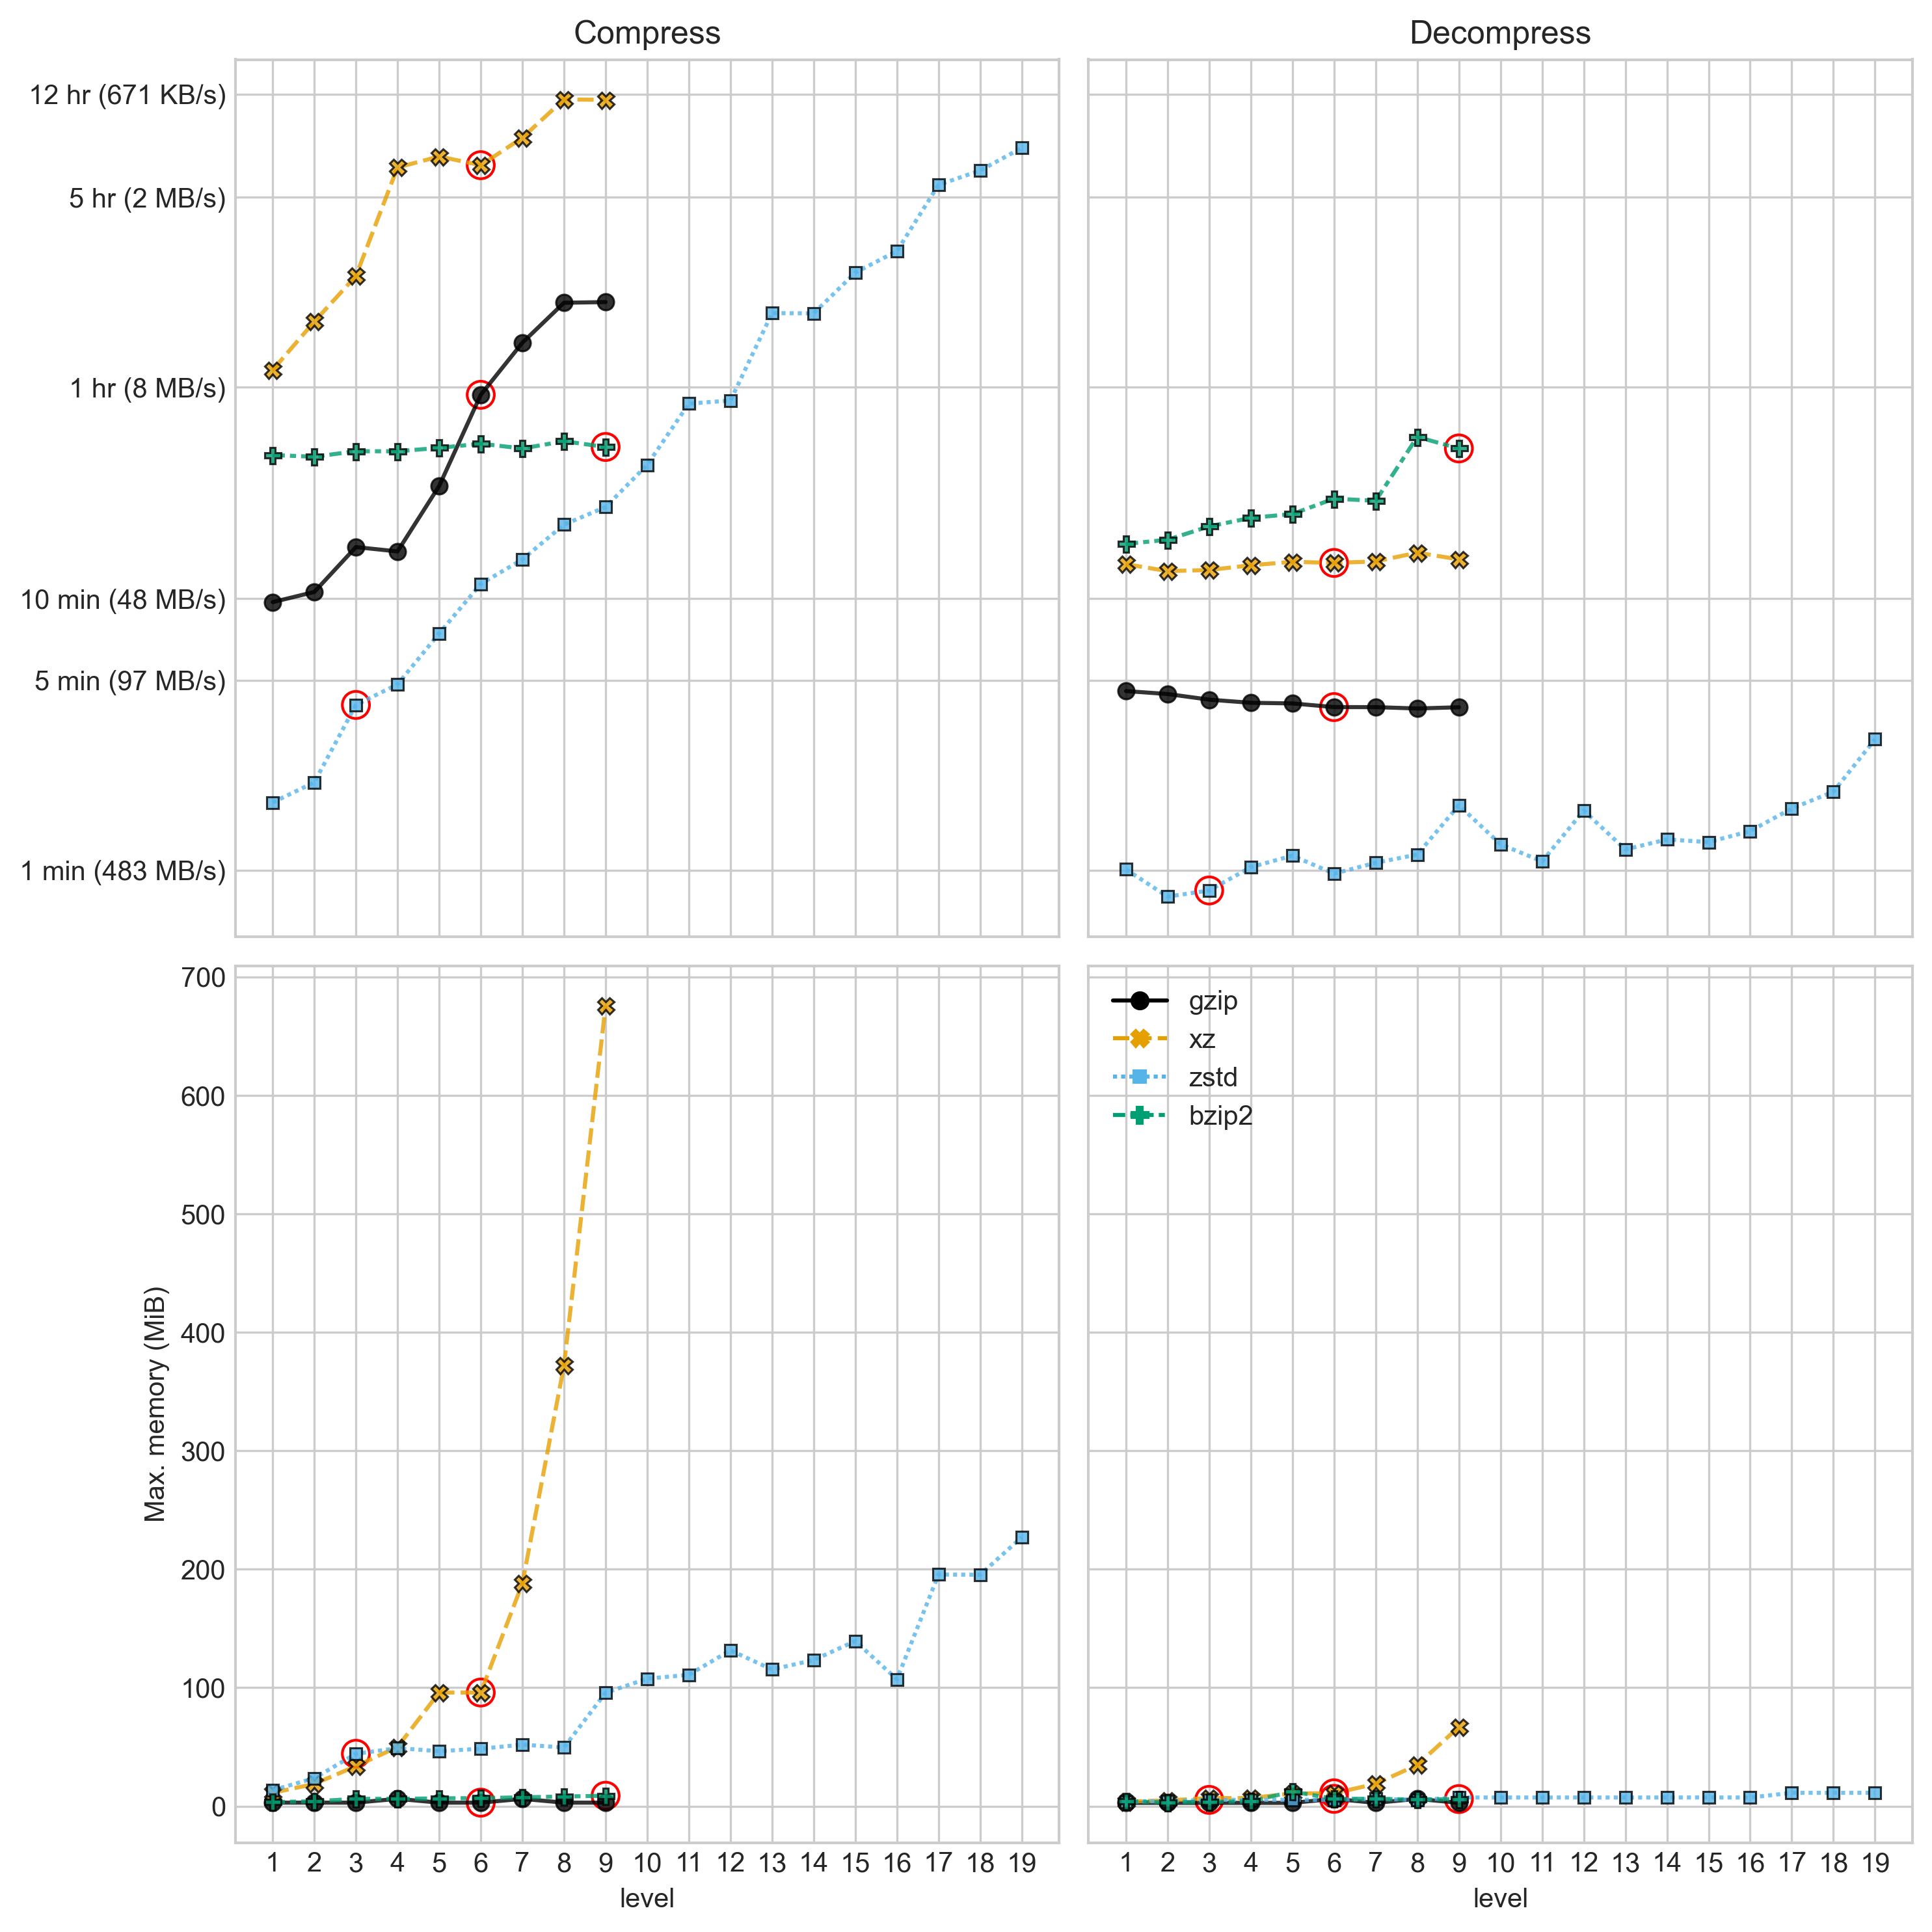

In [251]:
ys = ["compress_secs", "decompress_secs", "compress_max_rss", "decompress_max_rss"]
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=DPI, figsize=(10, 10), sharex=True, sharey="row", tight_layout=True)
data = df.query("technology=='nanopore'")

for i, (y, ax) in enumerate(zip(ys, axes.flatten())):
    sns.lineplot(
        data=data, 
        x="level", 
        y=y, 
        hue="tool", 
        style="tool",
        palette=PALETTE,
        markers=True,
        ax=ax,
        mec="black",
        alpha=0.8
    )
    xticks = list(range(1, 20))
    _ = ax.set_xticks(xticks)
    
    if "secs" in y:
        ax.set_ylabel("")
        ax.set_title(y.replace("_secs", "").capitalize())
        ax.set_yscale("log")
        MIN = 60
        HR = MIN * 60
        yticks = [MIN, 5*MIN, 10*MIN, HR, 5*HR, 12*HR]
        ax.set_yticks(yticks)
        yticklabels = []
        for secs in yticks:
            rate, unit = format_size(uncompressed / secs).split()
            rate = round(float(rate))
            time = format_time(format_timespan(secs))
            yticklabels.append(f"{time} ({rate} {unit}/s)")
            
        ax.set_yticklabels(yticklabels)

        ax.legend(loc="upper right")
        
    else:
        ax.set_ylabel("Max. memory (MiB)")
        
    
    if y != "decompress_max_rss":
        ax.get_legend().remove()
    else:
        ax.legend(loc="upper left")
        
    for (tool, lvl) in default_lvl.items():
        yval = data.query("tool==@tool and level==@lvl")[y][0]
        ax.scatter(lvl, yval, s=100, fc='None', ec="red")